<a href="https://colab.research.google.com/github/EAakiyama3104/python_lecture/blob/master/%5BPython%E8%AC%9B%E5%BA%A7%5D%E7%AC%AC5%E5%9B%9E%E6%AD%8C%E8%A9%9E%E3%82%B5%E3%82%A4%E3%83%88%E3%81%AE%E3%82%B9%E3%82%AF%E3%83%AC%E3%82%A4%E3%83%94%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Webスクレイピングとは


* Webサイトから情報を取得する技術
* APIを公開していないサイトの情報も取得できる
* HTMLを読み込んで、必要な情報を抜き出す必要がある

手順


1. HTTPリクエストを送り、HTMLのレスポンスを取得
2. HTMLの中身を見て、必要な情報がある場所を確認
3. HTMLから必要な情報を抽出





## アーティストのページから歌詞ページ一覧を取得

今回は、Uta-Net からあるアーティスト(米津玄師)の歌詞をすべて取得。

以下のページから情報を取得

* アーティストページ - 曲ページのURLをすべて取得
* 曲ページ(歌詞ページ) - 歌詞を取得

requests について

* PythonのコードからHTTPリクエストを送るためのライブラリ
* 使い方が簡単


https://requests-docs-ja.readthedocs.io/en/latest/

beatiful soup について

* HTMLやXMLからデータを抽出するためのライブラリ
* 様々な条件でHTML上のデータの位置を指定

機能が多いので、使用の際はリファレンスを読むことをおすすめします。
http://kondou.com/BS4/

In [0]:
# 必要なライブラリをインポート
import bs4
import requests
import time
from pprint import pprint

In [0]:
# アーティストページ(米津玄師)のアドレス
ARTIST_URL = 'https://www.uta-net.com/artist/11591/'

# 曲ページの先頭アドレス
BASE_URL = 'https://www.uta-net.com'

In [0]:
# ページを読み込むFunction
def load_page(url):
  response = requests.get(url)
  response.raise_for_status()
  return response.text

In [0]:
artist_page = load_page(ARTIST_URL)

In [5]:
artist_page

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "//www.w3.org/TR/html4/loose.dtd">\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:mixi="http://mixi-platform.com/ns#" lang="ja">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n\t<title>LiSAの歌詞一覧リスト - 歌ネット</title>\r\n\t<meta name="description" content="LiSAの歌詞一覧リストページです。歌詞検索サービス歌ネットに登録されている「LiSA」の歌詞の曲目一覧を掲載しています。I doubt it,ID,I&#039;m a Rock star,赤い罠(who loves it?),AxxxiS,アコガレ望遠鏡,アシアトコンパス,ADAMAS\u3000歌ネットは無料の歌詞検索サービスです。 ">\r\n\t<meta name="keywords" content="LiSA,歌詞,I doubt it,ID,I&#039;m a Rock star,赤い罠(who loves it?),AxxxiS,アコガレ望遠鏡,アシアトコンパス,ADAMAS">\r\n\t<meta name="viewport" content="width=1190, maximum-scale=1, user-scalable=1">\r\n\t<link rel="Bookmark" href="https://www.uta-net.com/" title="歌詞検索の歌ネット">\r\n\t<link rel="canonical" href="https://www.uta-net.com/artist/11591/">\r\n\t<link rel="alternate" media="only screen and (max-width: 640px)" href="https://sp.uta-net.com/artist/1159

In [0]:
# タグをすべて取得する関数
def get_tags(page, target_tag):
  soup = bs4.BeautifulSoup(str(page), 'html.parser')
  tags = soup.find_all(target_tag)
  return tags

In [7]:
# td タグをすべて取得
td_list = get_tags(artist_page, 'td')
td_list

[<td class="side td1"><a href="/song/150571/">I doubt it</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/40876/">LiSA</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/31643/">岸田</a></td>,
 <td class="side td5">確かな耳鳴りゆがんだ世界に</td>,
 <td class="side td1"><a href="/song/198612/">ID</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/10159/">LiSA・古屋真</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/39887/">高橋浩一郎</a></td>,
 <td class="side td5">全方向完全アウェイで</td>,
 <td class="side td1"><a href="/song/144541/">I'm a Rock star</a></td>,
 <td class="td2"><a href="https://www.uta-net.com/artist/11591/">LiSA</a></td>,
 <td class="td3"><a href="https://www.uta-net.com/lyricist/10159/">LiSA・古屋真</a></td>,
 <td class="td4"><a href="https://www.uta-net.com/composer/36752

In [8]:
# 最初のtdタグを取得
td_list[0]

<td class="side td1"><a href="/song/150571/">I doubt it</a></td>

In [0]:
# 最初のtdタグからaタグを取得
a_list = get_tags(td_list[0], 'a')
a_list

[<a href="/song/278749/">ハウル</a>]

In [0]:
# href属性を見て、URLに'song'が含まれているかを確認
a_list[0].get('href')

'/song/278749/'

In [0]:
if 'song' in a_list[0].get('href'):
  print(BASE_URL + a_list[0].get('href'))

https://www.uta-net.com/song/278749/


In [0]:
# 歌詞ページのURLのリスト
track_urls = []

In [0]:
# すべての曲のURLを取得
# td タグのリストを1つずつ処理
for td in td_list:
  # a タグのリストを取得し、1つずつ処理
  for a in get_tags(td, 'a'):
    # aタグのhref属性を取得
    href = a.get('href')
    # URLに'song'が入っている場合
    if 'song' in href:
      # track_urls に完全なURLを追加
      track_urls.append(BASE_URL + href)

In [0]:
# URLのリスト
track_urls

['https://www.uta-net.com/song/278749/',
 'https://www.uta-net.com/song/278748/',
 'https://www.uta-net.com/song/278747/',
 'https://www.uta-net.com/song/278546/',
 'https://www.uta-net.com/song/150571/',
 'https://www.uta-net.com/song/198612/',
 'https://www.uta-net.com/song/144541/',
 'https://www.uta-net.com/song/260369/',
 'https://www.uta-net.com/song/213432/',
 'https://www.uta-net.com/song/181508/',
 'https://www.uta-net.com/song/163669/',
 'https://www.uta-net.com/song/257111/',
 'https://www.uta-net.com/song/240265/',
 'https://www.uta-net.com/song/163579/',
 'https://www.uta-net.com/song/181506/',
 'https://www.uta-net.com/song/126138/',
 'https://www.uta-net.com/song/133655/',
 'https://www.uta-net.com/song/248506/',
 'https://www.uta-net.com/song/186930/',
 'https://www.uta-net.com/song/154518/',
 'https://www.uta-net.com/song/115389/',
 'https://www.uta-net.com/song/126143/',
 'https://www.uta-net.com/song/115388/',
 'https://www.uta-net.com/song/260496/',
 'https://www.ut

## 歌詞ページから歌詞を取得

歌詞ページの例: https://www.uta-net.com/song/162135/

In [0]:
track_urls[0]

'https://www.uta-net.com/song/278749/'

In [0]:
lyric_page = load_page(track_urls[0])

In [0]:
lyric_page

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "//www.w3.org/TR/html4/loose.dtd">\r\n<html xmlns:og="http://ogp.me/ns#" xmlns:mixi="http://mixi-platform.com/ns#" lang="ja">\r\n<head>\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n\t<meta name="viewport" content="width=1024, maximum-scale=1, user-scalable=1">\r\n\t<title>LiSA ハウル 歌詞 - 歌ネット</title>\r\n\t<meta property="og:title" content="「ハウル/LiSA」の歌詞 って「イイネ！」" />\r\n\t<meta property="og:description" content="「立ち止まって嘆いても\u3000キミはキミのまん…」勇気をもらったり、泣けたり、癒されたり…、この歌詞をチェックしてみて！人の心を打つ「言葉」がぎっしり！" />\r\n\t<meta property="og:image" content="https://www.uta-net.com/reverse/mixi_check/uta_net_logo_m.gif">\r\n\t<meta property="mixi:device-smartphone" content="https://sp.uta-net.com/song/278749/">\r\n\t<meta name="mixi-check-robots" CONTENT="notitle, nodescription">\r\n\t<meta name="description" content="LiSAの「ハウル」歌詞ページです。作詞:LiSA,作曲:HIDEO NEKOTA。(歌いだし)立ち止まって嘆いても 歌ネットは無料の歌詞検索サービスです。">\r\n\t<meta name="keywor

In [0]:
soup = bs4.BeautifulSoup(lyric_page, 'html.parser')

In [0]:
# id が kashi_area のタグを探す
soup.find(id='kashi_area')

<div id="kashi_area" itemprop="text">立ち止まって嘆いても　キミはキミのまんま<br>祈り飽きてみれば　未来は変わる<br><br/>失うこと怯え続けて　悲しみに慣れるなよ<br/>さぁ、行け　誰も待たずに行け<br/><br/>駆け抜けろ時代を　裸足で知る痛みを<br/>風で乾いた汗を　キミは優しい人さ。<br/>そうやって今日を生きてる　諦め悪く生きてる<br/>枯れるまで吠えてやれ　泣けるまでもっと　さぁ、吠えてやれ！<br/><br/>果てしない未来を走り続けたら<br/>いつの間にか出来た　僕の飛行機雲<br/><br/>傷つくこと恐れ続けて　自分を忘れるなよ<br/>さぁ、行け　全部腐る前に<br/><br/>燃えさかる情熱の　赤い血滲んだって<br/>登り切った丘で　もっと高い山を目指してる<br/>そうやって　いつも探してる　死ねない理由を探してる<br/>枯れるまで吠えてやれ　泣けるまでもっと　さぁ、吠えてやれ！<br/><br/>悲しくなんかないけど　涙が出るんだ<br/>楽しくないけど　笑い飛ばせるんだ<br/>いつだって　いつだって　僕らの面倒な心だ<br/><br/>いつか終わりがくるまで　悩んで　迷って<br/>最後の最後に答え合わせをしよう<br/>さぁ、行け　誰も待たずに行け<br/><br/>駆け抜けろ時代を　裸足で知る痛みを<br/>風で乾いた汗を　キミは優しい人さ。<br/>そうやって今日を生きてる　諦め悪く生きてる<br/>枯れるまで吠えてやれ　泣けるまでもっと　さぁ！<br/><br/>駆け抜けろよ海原を　赤い髪振り乱して<br/>全力で生きた先に　キミが待っていたんだ<br/>今日を越えていけ　今日を越えていけ<br/>枯れるまで吠えてやれ　泣けるまでもっと　さぁ、吠えてやれ！</br></br></div>

In [0]:
# テキストのみを抽出
soup.find(id='kashi_area').text

'立ち止まって嘆いても\u3000キミはキミのまんま祈り飽きてみれば\u3000未来は変わる失うこと怯え続けて\u3000悲しみに慣れるなよさぁ、行け\u3000誰も待たずに行け駆け抜けろ時代を\u3000裸足で知る痛みを風で乾いた汗を\u3000キミは優しい人さ。そうやって今日を生きてる\u3000諦め悪く生きてる枯れるまで吠えてやれ\u3000泣けるまでもっと\u3000さぁ、吠えてやれ！果てしない未来を走り続けたらいつの間にか出来た\u3000僕の飛行機雲傷つくこと恐れ続けて\u3000自分を忘れるなよさぁ、行け\u3000全部腐る前に燃えさかる情熱の\u3000赤い血滲んだって登り切った丘で\u3000もっと高い山を目指してるそうやって\u3000いつも探してる\u3000死ねない理由を探してる枯れるまで吠えてやれ\u3000泣けるまでもっと\u3000さぁ、吠えてやれ！悲しくなんかないけど\u3000涙が出るんだ楽しくないけど\u3000笑い飛ばせるんだいつだって\u3000いつだって\u3000僕らの面倒な心だいつか終わりがくるまで\u3000悩んで\u3000迷って最後の最後に答え合わせをしようさぁ、行け\u3000誰も待たずに行け駆け抜けろ時代を\u3000裸足で知る痛みを風で乾いた汗を\u3000キミは優しい人さ。そうやって今日を生きてる\u3000諦め悪く生きてる枯れるまで吠えてやれ\u3000泣けるまでもっと\u3000さぁ！駆け抜けろよ海原を\u3000赤い髪振り乱して全力で生きた先に\u3000キミが待っていたんだ今日を越えていけ\u3000今日を越えていけ枯れるまで吠えてやれ\u3000泣けるまでもっと\u3000さぁ、吠えてやれ！'

In [0]:
# 全角スペースが文字化けしているので、半角スペースに置換
soup.find(id='kashi_area').text.replace('　', '\n')

'立ち止まって嘆いても\nキミはキミのまんま祈り飽きてみれば\n未来は変わる失うこと怯え続けて\n悲しみに慣れるなよさぁ、行け\n誰も待たずに行け駆け抜けろ時代を\n裸足で知る痛みを風で乾いた汗を\nキミは優しい人さ。そうやって今日を生きてる\n諦め悪く生きてる枯れるまで吠えてやれ\n泣けるまでもっと\nさぁ、吠えてやれ！果てしない未来を走り続けたらいつの間にか出来た\n僕の飛行機雲傷つくこと恐れ続けて\n自分を忘れるなよさぁ、行け\n全部腐る前に燃えさかる情熱の\n赤い血滲んだって登り切った丘で\nもっと高い山を目指してるそうやって\nいつも探してる\n死ねない理由を探してる枯れるまで吠えてやれ\n泣けるまでもっと\nさぁ、吠えてやれ！悲しくなんかないけど\n涙が出るんだ楽しくないけど\n笑い飛ばせるんだいつだって\nいつだって\n僕らの面倒な心だいつか終わりがくるまで\n悩んで\n迷って最後の最後に答え合わせをしようさぁ、行け\n誰も待たずに行け駆け抜けろ時代を\n裸足で知る痛みを風で乾いた汗を\nキミは優しい人さ。そうやって今日を生きてる\n諦め悪く生きてる枯れるまで吠えてやれ\n泣けるまでもっと\nさぁ！駆け抜けろよ海原を\n赤い髪振り乱して全力で生きた先に\nキミが待っていたんだ今日を越えていけ\n今日を越えていけ枯れるまで吠えてやれ\n泣けるまでもっと\nさぁ、吠えてやれ！'

In [0]:
soup.find(id='kashi_area').text.split('')

['立ち止まって嘆いても\u3000キミはキミ',
 'まんま祈り飽きてみれば\u3000未来は変わる失うこと怯え続けて\u3000悲しみに慣れるなよさぁ、行け\u3000誰も待たずに行け駆け抜けろ時代を\u3000裸足で知る痛みを風で乾いた汗を\u3000キミは優しい人さ。そうやって今日を生きてる\u3000諦め悪く生きてる枯れるまで吠えてやれ\u3000泣けるまでもっと\u3000さぁ、吠えてやれ！果てしない未来を走り続けたらいつ',
 '間にか出来た\u3000僕',
 '飛行機雲傷つくこと恐れ続けて\u3000自分を忘れるなよさぁ、行け\u3000全部腐る前に燃えさかる情熱',
 '\u3000赤い血滲んだって登り切った丘で\u3000もっと高い山を目指してるそうやって\u3000いつも探してる\u3000死ねない理由を探してる枯れるまで吠えてやれ\u3000泣けるまでもっと\u3000さぁ、吠えてやれ！悲しくなんかないけど\u3000涙が出るんだ楽しくないけど\u3000笑い飛ばせるんだいつだって\u3000いつだって\u3000僕ら',
 '面倒な心だいつか終わりがくるまで\u3000悩んで\u3000迷って最後',
 '最後に答え合わせをしようさぁ、行け\u3000誰も待たずに行け駆け抜けろ時代を\u3000裸足で知る痛みを風で乾いた汗を\u3000キミは優しい人さ。そうやって今日を生きてる\u3000諦め悪く生きてる枯れるまで吠えてやれ\u3000泣けるまでもっと\u3000さぁ！駆け抜けろよ海原を\u3000赤い髪振り乱して全力で生きた先に\u3000キミが待っていたんだ今日を越えていけ\u3000今日を越えていけ枯れるまで吠えてやれ\u3000泣けるまでもっと\u3000さぁ、吠えてやれ！']

In [0]:
for sentence in soup.find(id='kashi_area').text.split('　'):
  print(sentence)

立ち止まって嘆いても
キミはキミのまんま祈り飽きてみれば
未来は変わる失うこと怯え続けて
悲しみに慣れるなよさぁ、行け
誰も待たずに行け駆け抜けろ時代を
裸足で知る痛みを風で乾いた汗を
キミは優しい人さ。そうやって今日を生きてる
諦め悪く生きてる枯れるまで吠えてやれ
泣けるまでもっと
さぁ、吠えてやれ！果てしない未来を走り続けたらいつの間にか出来た
僕の飛行機雲傷つくこと恐れ続けて
自分を忘れるなよさぁ、行け
全部腐る前に燃えさかる情熱の
赤い血滲んだって登り切った丘で
もっと高い山を目指してるそうやって
いつも探してる
死ねない理由を探してる枯れるまで吠えてやれ
泣けるまでもっと
さぁ、吠えてやれ！悲しくなんかないけど
涙が出るんだ楽しくないけど
笑い飛ばせるんだいつだって
いつだって
僕らの面倒な心だいつか終わりがくるまで
悩んで
迷って最後の最後に答え合わせをしようさぁ、行け
誰も待たずに行け駆け抜けろ時代を
裸足で知る痛みを風で乾いた汗を
キミは優しい人さ。そうやって今日を生きてる
諦め悪く生きてる枯れるまで吠えてやれ
泣けるまでもっと
さぁ！駆け抜けろよ海原を
赤い髪振り乱して全力で生きた先に
キミが待っていたんだ今日を越えていけ
今日を越えていけ枯れるまで吠えてやれ
泣けるまでもっと
さぁ、吠えてやれ！


In [0]:
# 歌詞を入れるリスト
lyrics = []

In [0]:
# すべての曲の歌詞をlyricsに入れる
for track_url in track_urls:
  lyric_page = load_page(track_url)
  soup = bs4.BeautifulSoup(lyric_page, 'html.parser')
  lyrics.append(soup.find(id='kashi_area').text.replace('　', ' '))
  time.sleep(1)

In [0]:
lyrics[:10]

['立ち止まって嘆いても キミはキミのまんま祈り飽きてみれば 未来は変わる失うこと怯え続けて 悲しみに慣れるなよさぁ、行け 誰も待たずに行け駆け抜けろ時代を 裸足で知る痛みを風で乾いた汗を キミは優しい人さ。そうやって今日を生きてる 諦め悪く生きてる枯れるまで吠えてやれ 泣けるまでもっと さぁ、吠えてやれ！果てしない未来を走り続けたらいつの間にか出来た 僕の飛行機雲傷つくこと恐れ続けて 自分を忘れるなよさぁ、行け 全部腐る前に燃えさかる情熱の 赤い血滲んだって登り切った丘で もっと高い山を目指してるそうやって いつも探してる 死ねない理由を探してる枯れるまで吠えてやれ 泣けるまでもっと さぁ、吠えてやれ！悲しくなんかないけど 涙が出るんだ楽しくないけど 笑い飛ばせるんだいつだって いつだって 僕らの面倒な心だいつか終わりがくるまで 悩んで 迷って最後の最後に答え合わせをしようさぁ、行け 誰も待たずに行け駆け抜けろ時代を 裸足で知る痛みを風で乾いた汗を キミは優しい人さ。そうやって今日を生きてる 諦め悪く生きてる枯れるまで吠えてやれ 泣けるまでもっと さぁ！駆け抜けろよ海原を 赤い髪振り乱して全力で生きた先に キミが待っていたんだ今日を越えていけ 今日を越えていけ枯れるまで吠えてやれ 泣けるまでもっと さぁ、吠えてやれ！',
 'キミはやさしくて 少し心配性ボクは夢見がちで 泣き虫なのに こんなに いっしょだ落ち込んでいたら いつも励ましたいくせに おんなじ顔して泣いてやり直すように 笑ってみせる永遠だって思える その一瞬が いとしい大丈夫 今日は言わせてよこんどはボクがキミをまもる番どんな未来でも つないでゆくよそれだけは 心配しないでいてよこのまま 景色が 変わっていってもずっといたい ずっといたい キミとうまくいかないと 甘えっぱなしで手を焼かせた日もあったっけ「忘れた」とか言うけどカレイドスコープのように一度まわしたら おんなじ模様にならないいま見せた表情(かお) 忘れたくないなぁ…いつも どこにいても 胸に描く ひとり大丈夫 今日は言わせてよ“いままで”を詰め込んだ ありがとうなんにもないボクじゃないってことキミが証明してくれたんだよたとえそう 遠く 離れていてもずっといる ずっといる ボクが約束させて もしキミの心が土砂降りのときにはボクの手で 空に虹を架

In [0]:
len(lyrics)

119

## MeCab を用いて形態素解析

MeCabのインストール

In [34]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-l

In [35]:
# 最新の辞書をダウンロード
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :   

# MeCabで1曲ずつ形態素解析を行う

形態素解析とは

文章を意味をもつ最小単位の表現に分解すること。最小単位は単語になることが多い。

In [0]:
# MeCab セットアップ
import MeCab
import subprocess

cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                           shell=True).communicate()[0]).decode('utf-8')
mecab = MeCab.Tagger("-d {0}".format(path))
mecab.parse('')

'EOS\n'

In [0]:
for word in mecab.parse('選挙の日ってうちじゃなぜか投票行って外食するんだ').split('\n'):
  print(word)

選挙の日	名詞,固有名詞,一般,*,*,*,選挙の日,センキョノヒ,センキョノヒ
って	助詞,格助詞,連語,*,*,*,って,ッテ,ッテ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
じゃ	助詞,副助詞,*,*,*,*,じゃ,ジャ,ジャ
なぜ	副詞,助詞類接続,*,*,*,*,なぜ,ナゼ,ナゼ
か	助詞,副助詞／並立助詞／終助詞,*,*,*,*,か,カ,カ
投票	名詞,サ変接続,*,*,*,*,投票,トウヒョウ,トーヒョー
行っ	動詞,自立,*,*,五段・カ行促音便,連用タ接続,行く,イッ,イッ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
外食	名詞,サ変接続,*,*,*,*,外食,ガイショク,ガイショク
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
ん	名詞,非自立,一般,*,*,*,ん,ン,ン
だ	助動詞,*,*,*,特殊・ダ,基本形,だ,ダ,ダ
EOS



In [0]:
mecab.parse('おのののか')

'おのののか\t名詞,固有名詞,人名,一般,*,*,おのののか,オノノノカ,オノノノカ\nEOS\n'

In [0]:
mecab.parse(lyrics[0])

'立ち止まっ\t動詞,自立,*,*,五段・ラ行,連用タ接続,立ち止まる,タチドマッ,タチドマッ\nて\t助詞,接続助詞,*,*,*,*,て,テ,テ\n嘆い\t動詞,自立,*,*,五段・カ行イ音便,連用タ接続,嘆く,ナゲイ,ナゲイ\nて\t助詞,接続助詞,*,*,*,*,て,テ,テ\nも\t助詞,係助詞,*,*,*,*,も,モ,モ\nキミ\t名詞,代名詞,一般,*,*,*,キミ,キミ,キミ\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\nキミ\t名詞,代名詞,一般,*,*,*,キミ,キミ,キミ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\nまんま\t名詞,非自立,副詞可能,*,*,*,まんま,マンマ,マンマ\n祈り\t動詞,自立,*,*,五段・ラ行,連用形,祈る,イノリ,イノリ\n飽き\t動詞,自立,*,*,一段,連用形,飽きる,アキ,アキ\nて\t助詞,接続助詞,*,*,*,*,て,テ,テ\nみれ\t動詞,非自立,*,*,一段,仮定形,みる,ミレ,ミレ\nば\t助詞,接続助詞,*,*,*,*,ば,バ,バ\n未来\t名詞,一般,*,*,*,*,未来,ミライ,ミライ\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n変わる\t動詞,自立,*,*,五段・ラ行,基本形,変わる,カワル,カワル\n失う\t動詞,自立,*,*,五段・ワ行促音便,基本形,失う,ウシナウ,ウシナウ\nこと\t名詞,非自立,一般,*,*,*,こと,コト,コト\n怯え\t動詞,自立,*,*,一段,連用形,怯える,オビエ,オビエ\n続け\t動詞,非自立,*,*,一段,連用形,続ける,ツヅケ,ツズケ\nて\t助詞,接続助詞,*,*,*,*,て,テ,テ\n悲しみ\t名詞,一般,*,*,*,*,悲しみ,カナシミ,カナシミ\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n慣れる\t動詞,自立,*,*,一段,基本形,慣れる,ナレル,ナレル\nな\t助詞,終助詞,*,*,*,*,な,ナ,ナ\nよ\t助詞,終助詞,*,*,*,*,よ,ヨ,ヨ\nさぁ\t感動詞,*,*,*,*,*,さぁ,サァ,サー\n、\t記号,読点,*,*,*,*,、,、,、\n行け\t動詞,自立,*,*,一段,連用形,行ける,イケ,イケ\n誰\t名詞,代名詞,一般,*,*,*,誰,ダレ,ダレ\nも\t助詞,係助詞,*,*,*,*,も

In [0]:
node = mecab.parseToNode(lyrics[0])

In [0]:
while node:
  #単語を取得
  word = node.surface
  #品詞を取得
  pos = node.feature.split(',')[0]
  if pos in ['名詞','形容詞','副詞','動詞']:
    print(word)
  #次の単語に進める
  node = node.next

立ち止まっ
嘆い
キミ
キミ
まんま
祈り
飽き
みれ
未来
変わる
失う
こと
怯え
続け
悲しみ
慣れる
行け
誰
待た
行け
駆け抜けろ
時代
裸足
知る
痛み
風
乾い
汗
キミ
優しい
人
そう
やっ
今日
生き
てる
諦め
悪く
生き
てる
枯れる
吠え
やれ
泣ける
もっと
吠え
やれ
果て
し
未来
走り
続け
いつの間にか
出来
僕
飛行機雲
傷つく
こと
恐れ
続け
自分
忘れる
行け
全部
腐る
前
燃えさかる
情熱
赤い
血
滲ん
登り
切っ
丘
もっと
高い
山
目指し
てる
そう
やっ
いつも
探し
てる
死ね
理由
探し
てる
枯れる
吠え
やれ
泣ける
もっと
吠え
やれ
悲しく
ない
涙
出る
ん
楽しく
笑い飛ばせる
ん
いつだって
いつだって
僕ら
面倒
心
いつか
終わり
くる
悩ん
迷っ
最後
最後
答え
合わせ
しよう
行け
誰
待た
行け
駆け抜けろ
時代
裸足
知る
痛み
風
乾い
汗
キミ
優しい
人
そう
やっ
今日
生き
てる
諦め
悪く
生き
てる
枯れる
吠え
やれ
泣ける
もっと
駆け抜けろ
海原
赤い
髪
振り乱し
全力
生き
先
キミ
待っ
いたん
今日
越え
いけ
今日
越え
いけ
枯れる
吠え
やれ
泣ける
もっと
吠え
やれ


In [0]:
# すべての曲の単語を入れる配列
words = []

for lyric in lyrics:
  node = mecab.parseToNode(lyric)
  while node:
    #単語を取得
    word = node.surface
    #品詞を取得
    pos = node.feature.split(',')[0]
    if pos in ['名詞','形容詞','副詞','動詞']:
      words.append(word)
    #次の単語に進める
    node = node.next

In [0]:
len(words)

19127

collections.Counter を使って単語の出現回数をカウント



In [0]:
import collections

word_counter = collections.Counter(words)

In [0]:
# 何種類の単語があるか
len(word_counter)

5748

In [0]:
# 単語の出現回数
word_counter['あなた']

16

In [0]:
# 出現回数が多い順に並べる
word_counter.most_common()

[('し', 232),
 ('僕', 209),
 ('キミ', 200),
 ('てる', 156),
 ('ん', 154),
 ('の', 104),
 ('今', 104),
 ('よう', 97),
 ('い', 95),
 ('そう', 93),
 ('君', 90),
 ('ない', 87),
 ('れ', 77),
 ('今日', 75),
 ('いい', 73),
 ('て', 69),
 ('I', 68),
 ('何', 68),
 ('私', 65),
 ('手', 63),
 ('アタシ', 62),
 ('もう', 60),
 ('く', 57),
 ('なっ', 55),
 ('未来', 54),
 ('世界', 54),
 ('中', 53),
 ('こと', 51),
 ('全部', 50),
 ('さ', 49),
 ('心', 48),
 ('ちゃう', 48),
 ('愛', 47),
 ('見', 47),
 ('いつか', 46),
 ('ずっと', 46),
 ('きっと', 46),
 ('you', 46),
 ('なる', 46),
 ('それ', 45),
 ('誰か', 45),
 ('Ah', 44),
 ('アナタ', 44),
 ('声', 43),
 ('時', 42),
 ('夢', 41),
 ('まだ', 40),
 ('s', 40),
 ('ちょっと', 40),
 ('忘れ', 37),
 ('一', 37),
 ('目', 37),
 ('そっと', 37),
 ('想い', 37),
 ('前', 36),
 ('いつも', 36),
 ('笑っ', 36),
 ('られ', 36),
 ('信じ', 36),
 ('せ', 35),
 ('いる', 35),
 ('空', 35),
 ('me', 35),
 ('もっと', 34),
 ('僕ら', 34),
 ('少し', 34),
 ('まま', 34),
 ('ある', 34),
 ('ココロ', 34),
 ('言葉', 33),
 ('my', 33),
 ('明日', 33),
 ('to', 33),
 ('胸', 32),
 ('遠く', 32),
 ('a', 32),
 ('みたい', 32),
 ('誰', 3

## ワードクラウドで可視化する

ワードクラウド（word cloud）とは単語を出現回数に比例する大きさで雲のように並べたもの


例

![代替テキスト](https://oku.edu.mie-u.ac.jp/~okumura/python/img/wc1.png)


Python では wordcloud モジュールで作成

In [0]:
# 日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (38.1 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 135649 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipaf

In [0]:
import matplotlib.pyplot as plt
import wordcloud

In [0]:
# 日本語フォントのパス
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

In [0]:
# wordcloud で使うために、単語のリストをスペース区切りの文字列に変換
words_str = ' '.join(words)

In [0]:
lyric_cloud = wordcloud.WordCloud(background_color="white", 
                                  font_path=fpath, 
                                  width=900, 
                                  height=500).generate(words_str)

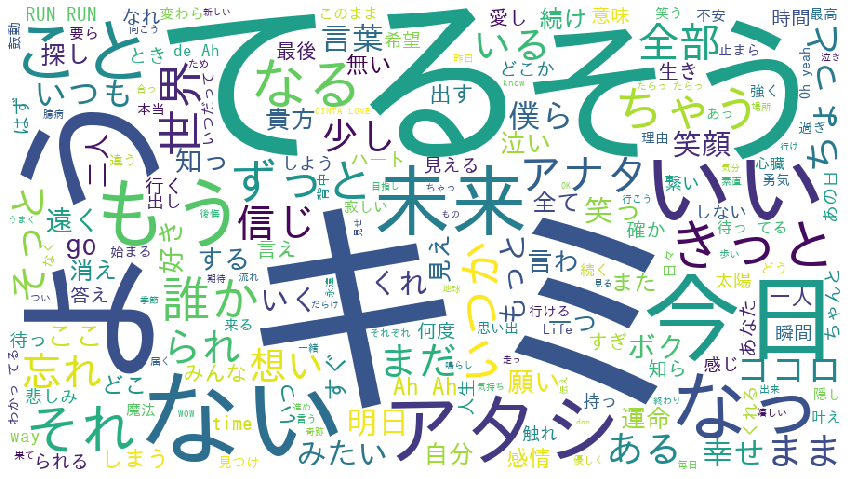

In [0]:
plt.figure(figsize=(15,12))
plt.imshow(lyric_cloud)
plt.axis("off")
plt.show()

意味を持たない単語が多くなってしまう

これを防ぐのが、stopwords。stopwordsで与えられた単語をword cloud から除外する

In [0]:
stop_words = [ 'てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'して', \
             'くれる', 'やる', 'くださる', 'そう', 'せる', 'した',  '思う',  \
             'それ', 'ここ', 'ちゃん', 'くん', '', 'て','に','を','は','の', 'が', 'と', 'た', 'し', 'で', \
             'ない', 'も', 'な', 'い', 'か', 'ので', 'よう', '']

In [0]:
lyric_cloud = wordcloud.WordCloud(background_color="white", 
                                  font_path=fpath,
                                  width=900, 
                                  height=500,
                                  stopwords=stop_words).generate(words_str)

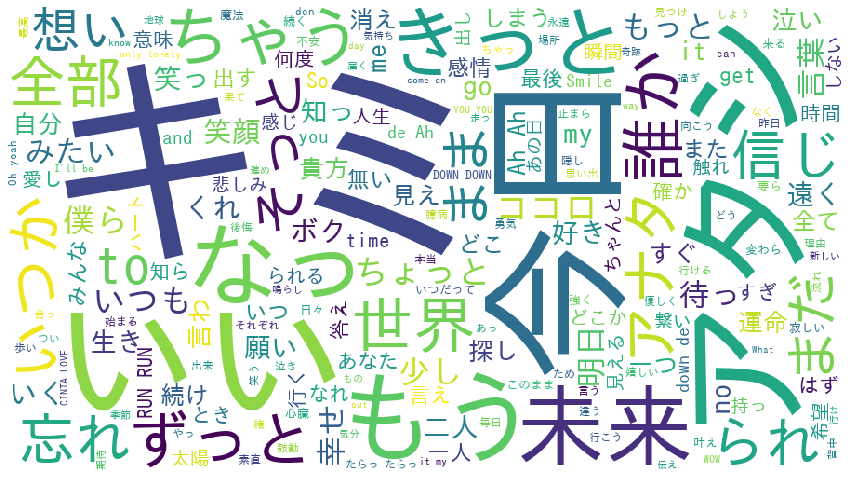

In [0]:
plt.figure(figsize=(15,12))
plt.imshow(lyric_cloud)
plt.axis("off")
plt.show()

# BERTで歌詞をしてみる（秋元康編）


In [0]:
!pip install tqdm
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [38]:
# Bertのコンポーネントの transformers をダウンロード
!pip install transformers
!git clone https://github.com/huggingface/transformers.git
!mkdir output


Cloning into 'transformers'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 20043 (delta 0), reused 2 (delta 0), pack-reused 20037
Receiving objects: 100% (20043/20043), 11.62 MiB | 6.26 MiB/s, done.
Resolving deltas: 100% (14650/14650), done.


In [0]:
# url
import urllib.parse
from tqdm import tqdm_notebook as tqdm
#人気順（昇順）
POPULAR_ASC = 3
# 人気順（降順)
POPULAR_DESC = 4
# 作詞者氏名で検索
SEARCH_TYPE_WRITER=3

class LyricFetcher():
  artist_name = None
  base_url = None
  lyrics_list = []

  def __init__(self,artist_name,base_url=BASE_URL):
    self.artist_name = artist_name

  def build_list_url(self, keyword, search_type=SEARCH_TYPE_WRITER, sort_type=POPULAR_ASC):
    return f"https://www.uta-net.com/search/?Aselect={search_type}&Bselect=3&Keyword={urllib.parse.quote(keyword)}&sort={sort_type}"
  
  def extract_track_urls(self, td_list, fetch_cnt):
    track_urls = []
    for td in td_list:
      # a タグのリストを取得し、1つずつ処理
      for a in get_tags(td, 'a'):
        # aタグのhref属性を取得
        href = a.get('href')
        # URLに'song'が入っている場合
        if 'song' in href:
          # track_urls に完全なURLを追加
          track_urls.append(BASE_URL + href)
    print(len(track_urls[:fetch_cnt]))
    return track_urls[:fetch_cnt]

  def get_tags(self, page, target_tag):
    soup = bs4.BeautifulSoup(str(page), 'html.parser')
    tags = soup.find_all(target_tag)
    return tags

  def load_page(self, url):
    response = requests.get(url)
    response.raise_for_status()
    return response.text 
  
  def fetch_lyric(self, track_url):
    if track_url == "":
      return None
    lyric_page = load_page(track_url)
    soup = bs4.BeautifulSoup(lyric_page, 'html.parser')
    # アクセス過多を防ぐために１秒間休止
    time.sleep(1)
    return soup.find(id='kashi_area').text.replace('　', ' ')
    
  def run_fetch(self, fetch_cnt=10, sort_type=POPULAR_ASC):
    # url 作成
    url= self.build_list_url(self.artist_name, sort_type)
    # アーティストページ取得
    artist_page= self.load_page(url)
    # td_list を作成
    td_list = self.get_tags(artist_page, 'td')
    # そこから曲のurlリストを抽出
    track_urls= self.extract_track_urls(td_list, fetch_cnt)

    for track_url in tqdm(track_urls):
      self.lyrics_list.append(self.fetch_lyric(track_url))
    # return self.lyrics_list

In [31]:
akimoto_lyrics = LyricFetcher("秋元康")
akimoto_lyrics.run_fetch(20)

20


['君も頑張れ そうだ みんなして頑張ろうしあわせは誰かからもらうものじゃなく掴むものその手を伸ばせよ今 この世界には見えない悲しみがどれだけ存在して 人々を泣かすのか？地球上のどこかに涙を溜めてる貯水池とかがあるなら 底の栓を抜いてしまえ一日が終わるまでに日向(ひなた)を探そう暖かくてほっとするそう 自分の居場所がきっと見つかるだろう僕も頑張る だから みんなも頑張れ誰も諦めなければ 未来だって輝いてるよ夢を見続けよう もしもそれが叶わなくても何かゴールがあったらモチベーションだ一緒に笑顔になろうなぜ笑ってる人と泣いてる人がいるの？しあわせの分配は 元々 同じなのに…誰かが何かを独り占めしたのか？それとも誰かに何かをただ押し付けられたのか？眠れない長い夜は夢でも見るんだわくわくして楽しいよああ 他人と比較をしても意味がない空を頑張る 天気 まだまだ崩れるな雨 落ちて来なければ 夕陽だって美しいだろう夜は待っているか？ やがて星は仲間を連れて暗い時間に希望を生(う)もうとするすべてを全力で行こう僕も頑張る だから みんなも頑張れ誰も諦めなければ 未来だって輝いてるよ夢を見続けよう もしもそれが叶わなくても何かゴールがあったらモチベーションだ一緒に笑顔になろう',
 '君は僕を待ってるか？今日の誓い ずっと信じるか？どんなに遅くなっても必ず戻るメロス約束を守るため 何差し出せばいい？命の代わりに未来を懸けてやる夜更けに語り合った遠い夢は僅(わず)かの勝算も成り立ってない愚かな選択と誰もが馬鹿にしているけど君だけが背中を押してくれたこの道僕は君を待たせない一度頷いたら裏切らないどんな誘惑でも振り切る自信がある(友情)生きることのその意味をいつの日にか きっと知ることができたらこれからの道を僕は迷わないWow wow wow...運命なんだ 走れ約束破ったら すべて失ってもいいこの世に生きてる価値さえなくなるよ最後に言いたかった僕の言葉わかっているさと君は微笑む帰って来るわけがないって噂されてるけど僕たちの絆が切れることはないんだ君は僕を信じてる何も疑わず見つめているどんな逆境でも乗り切る覚悟がある(全力)一人きりじゃないことを手を握った君が教えてくれたんだ暗闇の時も僕は恐れない理屈ばかり言って走り出さない者たちを僕は一番軽蔑する世界は思うよりも希望に満ち溢れてるだから絶

In [0]:
from transformers import BertJapaneseTokenizer
tokenizer = BertJapaneseTokenizer.from_pretrained('bert-base-japanese-whole-word-masking')
track_token=tokenizer.tokenize(akimoto_lyrics.lyrics_list[0])